![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


# Titanic Kaggle Competition. 

In [1]:
# Load the Libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr

import sys
import re
import datetime

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset

training_raw = pd.read_csv("train.csv")
testing_raw = pd.read_csv("test.csv")


# EDA: Tables and Visualizations

In [3]:
# Number of rows and features
print(training_raw.shape)

# Print name of features
print(training_raw.columns)

(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [4]:
# Identifying the target variable y.
y_name = 'Survived'
y = training_raw[y_name]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Tables and Numeric Data Exploration

In [5]:
training_raw.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
4718**.5

68.68769904429759

In [7]:
training_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Missing data

In [56]:
# store the index of features with over 70% missing data.
missing_cutoff = .7
indx_miss = []

#print("#   Feature          Missing Percentage".format()) # This is brute force method. Below is more elegant method

print("{:<3} {:<16} {:^16} {:^20}".format('#', 'Column', 'Missing Percentage', 'Missing Count'))
print("{:<3} {:<16} {:^16} {:^20}".format('-', '--------', '------------------', '-------------'))
for i, var in enumerate(training_raw.columns):
    missing_count = sum(training_raw[var].isnull())
    missing_per = round(sum(training_raw[var].isnull())/training_raw.shape[0], 2)
    if missing > missing_cutoff:
            indx_miss.append(i)
    print("{:<3} {:<16} {:^16.1%} {:>12}".format(i, var, missing_per, missing_count))

print()
print('Column indexes with more than 70% missing data: ', indx_miss)

#   Column           Missing Percentage    Missing Count    
-   --------         ------------------    -------------    
0   PassengerId            0.0%                  0
1   Survived               0.0%                  0
2   Pclass                 0.0%                  0
3   Name                   0.0%                  0
4   Sex                    0.0%                  0
5   Age                   20.0%                177
6   SibSp                  0.0%                  0
7   Parch                  0.0%                  0
8   Ticket                 0.0%                  0
9   Fare                   0.0%                  0
10  Cabin                 77.0%                687
11  Embarked               0.0%                  2
12  Cabin_clean           77.0%                687

Column indexes with more than 70% missing data:  []


In [9]:
training_raw.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
#cat_features = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked']

#num_features = ['Age','Fare']

#keep_features = cat_features + num_features
#print(keep_features)

In [11]:
#for var in training_raw.columns:
#    print(training_raw[var].dtype)

### Identify and separate categorical and numeric features. 

cat_features = []
num_features = []

In [12]:
# Code to separate into ID, categorical, and numerical variables.

id_features = []
cat_features = []
num_features = []

for var in training_raw.columns:
    
    if training_raw[var].dtype == 'object':
        if len(training_raw[var].unique()) >=  training_raw.shape[0]*.9:
            id_features.append(var)
        else:
            cat_features.append(var)
            
    elif len(training_raw[var].unique()) < training_raw.shape[0]*.01 :
        cat_features.append(var)
        
    elif (training_raw[var].dtype == 'int64') & (len(training_raw[var].unique()) >= training_raw.shape[0]*.9):
        id_features.append(var)
        
    else:
        num_features.append(var)
        
print('id_features :', id_features)
print('cat_features :', cat_features)
print('num_features :', num_features) 

id_features : ['PassengerId', 'Name']
cat_features : ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked']
num_features : ['Age', 'Fare']


In [24]:
print(training_raw.nunique())
print(training_raw[cat_features].nunique())

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64
Survived      2
Pclass        3
Sex           2
SibSp         7
Parch         7
Ticket      681
Cabin       147
Embarked      3
dtype: int64


0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object
0    NaN
1      C
2    NaN
3      C
4    NaN
Name: Cabin_clean, dtype: object
C       51
B       36
E       32
D       32
A       15
F        9
BB       7
CCC      4
G        4
CC       4
FG       3
BBB      2
BBBB     2
T        1
DD       1
FE       1
Name: Cabin_clean, dtype: int64
There are this many NaNs:  687


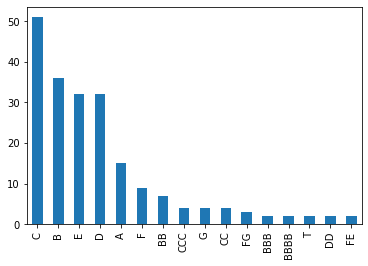

In [42]:
training_raw['Cabin']
training_raw['Cabin'].value_counts().plot(kind='bar')
print(training_raw['Cabin'].head())
training_raw['Cabin_clean'] = training_raw['Cabin'].str.replace('[^a-zA-Z]', '')
print(training_raw['Cabin_clean'].head())
training_raw['Cabin_clean'].value_counts().plot(kind = 'bar')
print(training_raw['Cabin_clean'].value_counts())
print('There are this many NaNs: ', sum(training_raw['Cabin_clean'].isnull()))

In [29]:
help(training_raw.Cabin.plot())

TypeError: no numeric data to plot

In [22]:
for var in training_raw.columns():
    print(training_raw[var].value_counts())

TypeError: 'Index' object is not callable

PassengerId
unique levels :891
This is most likely a continuous variable.
--------
Survived
unique levels :2
This is most likely a categorical variable.
Levels:
0    549
1    342
Name: Survived, dtype: int64


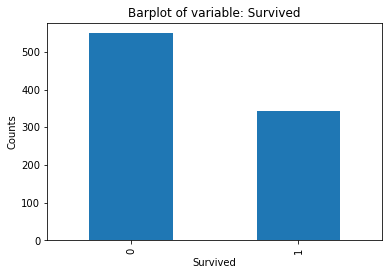

--------
Pclass
unique levels :3
This is most likely a categorical variable.
Levels:
3    491
1    216
2    184
Name: Pclass, dtype: int64


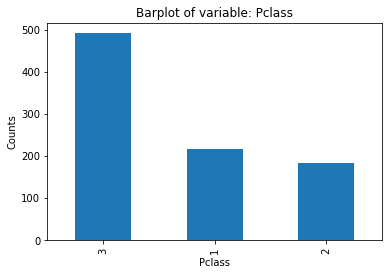

--------
Name
unique levels :891
This is most likely a continuous variable.
--------
Sex
unique levels :2
This is most likely a categorical variable.
Levels:
male      577
female    314
Name: Sex, dtype: int64


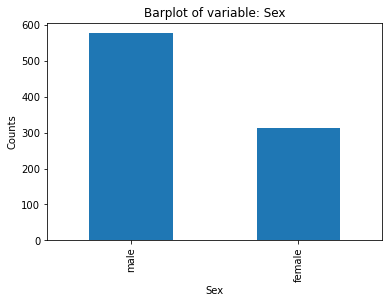

--------
Age
unique levels :89
This is most likely a continuous variable.
--------
SibSp
unique levels :7
This is most likely a categorical variable.
Levels:
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


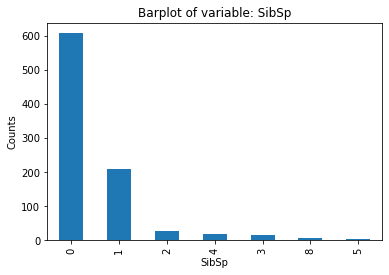

--------
Parch
unique levels :7
This is most likely a categorical variable.
Levels:
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


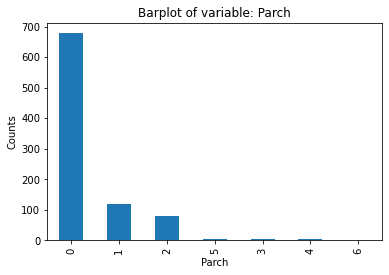

--------
Ticket
unique levels :681
This is most likely a continuous variable.
--------
Fare
unique levels :248
This is most likely a continuous variable.
--------
Cabin
unique levels :148
This is most likely a continuous variable.
--------
Embarked
unique levels :4
This is most likely a categorical variable.
Levels:
S    644
C    168
Q     77
Name: Embarked, dtype: int64


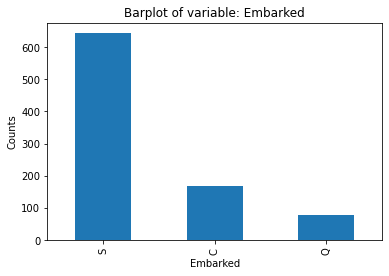

--------


In [13]:
for var in training_raw.columns:
    print(var)
    #print(training_raw[var].value_counts())
    print('unique levels :{}'.format(len(training_raw[var].unique())))
    if len(training_raw[var].unique()) < 20:
        print('This is most likely a categorical variable.')
        print('Levels:')
        print(training_raw[var].value_counts())
        training_raw[var].value_counts().plot(kind = 'bar')
        plt.xlabel(var)
        plt.ylabel('Counts')
        plt.title('Barplot of variable: ' + var)
        plt.show()
    else:
        print('This is most likely a continuous variable.')
        num_features.append(var)
    print('--------')   
    #print( )
    

# Visual Exploration



Survived


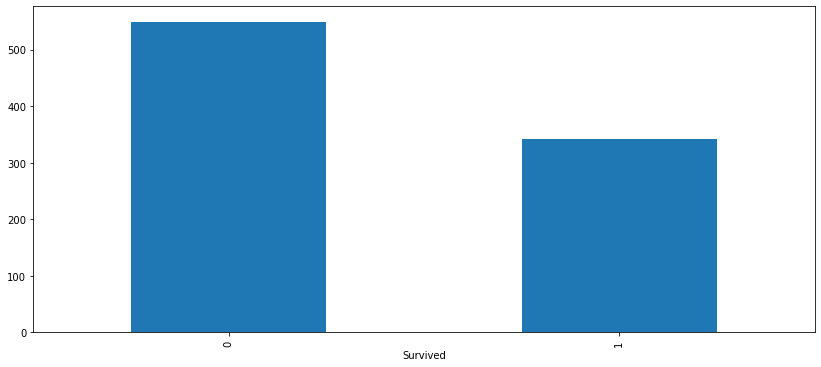

Pclass


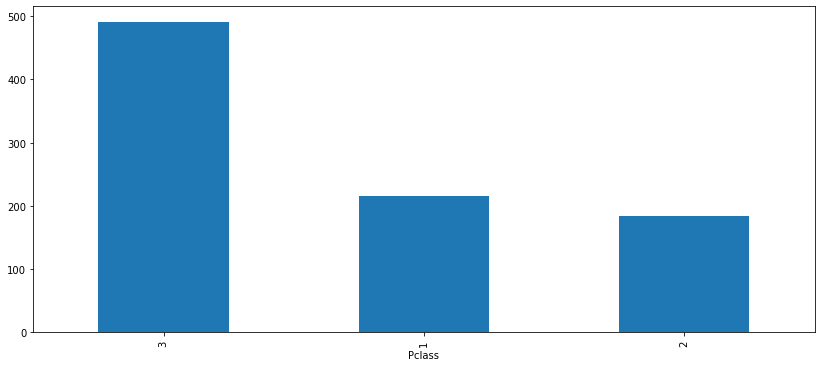

Sex


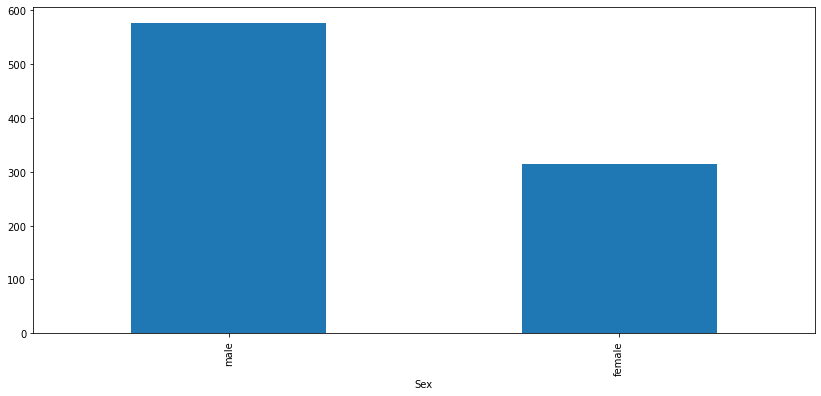

SibSp


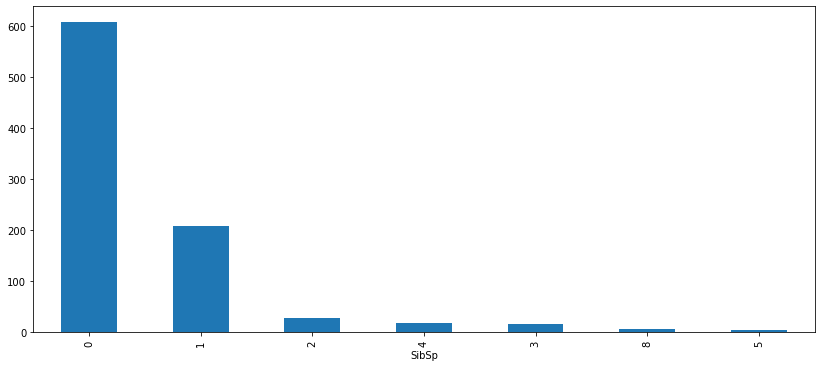

Parch


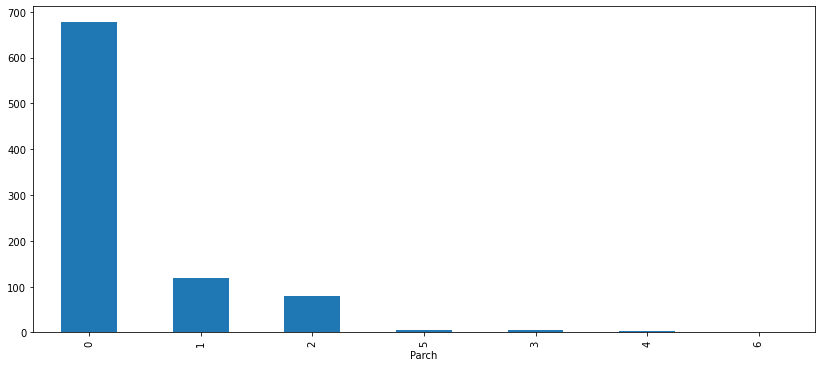

Ticket


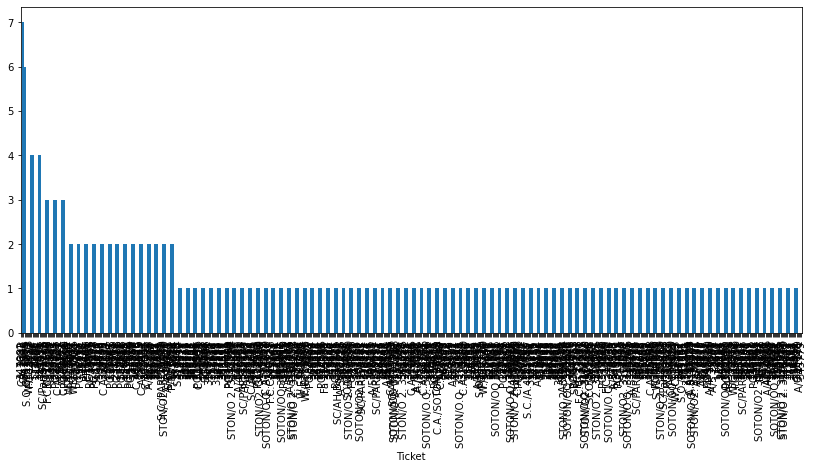

Cabin


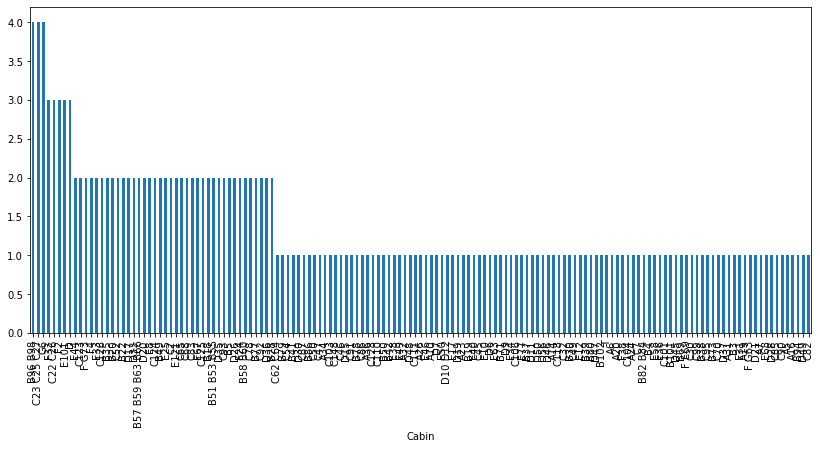

Embarked


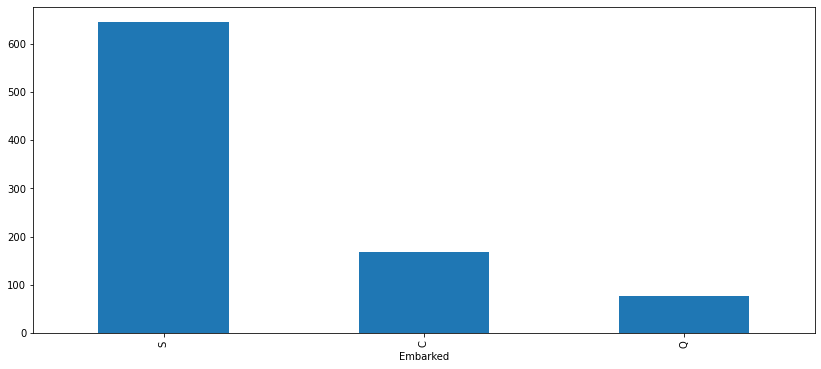

In [14]:
for var in cat_features:
    training_raw[var].value_counts().plot(kind='bar', figsize = (14,6))
    plt.xlabel(var)
    print(var)
    plt.show()

In [15]:
### Hot one-encode all categorical features. 
training = training_raw

for cat_var in cat_features:
    training = pd.concat([training, pd.get_dummies(training_raw[cat_var], drop_first = True)],axis=1)
    
training = training.drop(cat_features, axis=1)
print(training_raw.shape)
print(training.shape)
training.head()

(891, 12)
(891, 848)


,PassengerId,Name,Age,Fare,1,2,3,male,1,2,...,F G63,F G73,F2,F33,F38,F4,G6,T,Q,S
0,1,"Braund, Mr. Owen Harris",22.0,7.2500,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,71.2833,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,"Heikkinen, Miss. Laina",26.0,7.9250,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,53.1000,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,5,"Allen, Mr. William Henry",35.0,8.0500,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1


## Create Histogram of numeric variables and Barplots of categorical variables. 


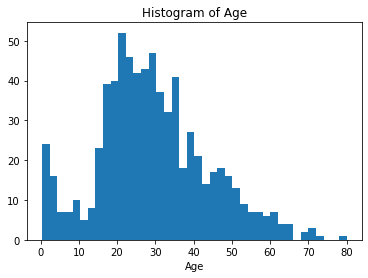

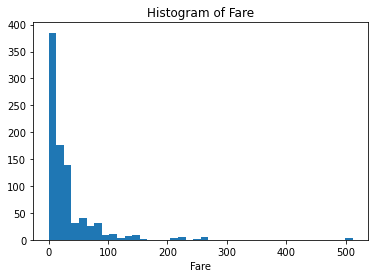

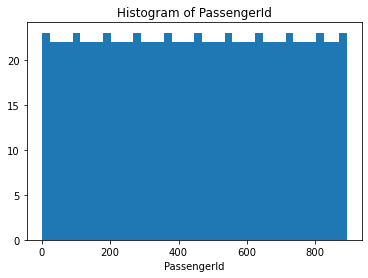

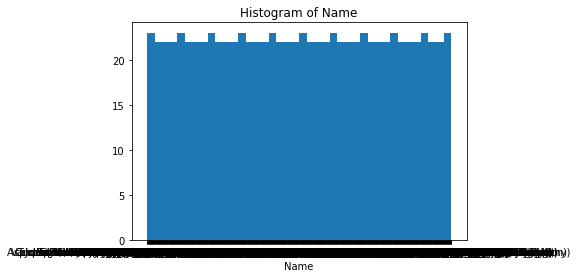

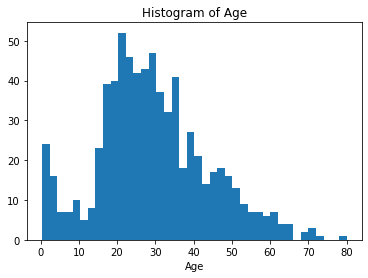

KeyError: 'Ticket'

In [16]:
### Histograms
for var in num_features:
    plt.hist(training[var], bins = 40)
    plt.xlabel(var)
    plt.title('Histogram of ' + var)
    plt.show()


In [ ]:
### Barplots
for var in cat_features:
    plt.bar(training_raw[var])
    plt.xlabel(var)
    plt.title("Barplot of ", + var)
    plt.show()


In [ ]:
### Bivariate scatter plots
nums = ['comments', 'duration', 'languages', 'num_speaker', 'views']
sns.pairplot(training_raw, vars=num_features, hue=np.array(y), hue_order = [1,0], diag_kind='kde', height=3);

In [17]:
### Correlation plot using pearson correlation
ratings = ['Funny', 'Beautiful', 'Ingenious', 'Courageous', 'Longwinded', 'Confusing', 'Informative', 'Fascinating', 'Unconvincing', 
           'Persuasive', 'Jaw-dropping', 'OK', 'Obnoxious', 'Inspiring', 'Popular']
plt.figure(figsize=(10,8))
sns.heatmap(ted[ratings].corr(), annot=True, cmap='RdBu');

NameError: name 'ted' is not defined

<Figure size 720x576 with 0 Axes>

In [22]:
### Heat Map?

# More EDA

In [3]:
# Separate training data into train and validation dataset: using 80:20. And Separate data into features and target

# target variable 
target = 'Survived'

if target.isnotnull(): # If target feature is identified
    X_train_raw, X_test_raw, y_train, y_test = train_test_split( training_raw.drop(columns = target, axis = 1)
                                                           , train_raw[target], test_size = 0.2, random_state = 1) 
                                                           
if target.isnull(): # If last variable is target variable. 
    X_train_raw, X_test_raw, y_train, y_test = train_test_split( training_raw.drop(columns = training_raw.columns[-1], axis = 1)
                                                   , training_raw[training.columns[-1]],  test_size = 0.2, random_state = 1)



In [ ]:
dataset_list = [X_train_raw, X_test_raw, y_train, y_test]

for dataset in dataset_list:
    print(dataset.shape)

In [ ]:
# Data Cleaning 

# Dealing with missing values

## Removing features with over 70% missing data.


## Filling in the mean

## Some imputation method


In [42]:
def scale_continuous_features(X_train, X_test, continuous_col_names = num_features ):

        # Scale Train set.
        X_train_scaled = X_train.copy()

        features = X_train_scaled[continuous_col_names]
        scaler = StandardScaler().fit(features.values) # Normalize the data to N(0,1)
        features = scaler.transform(features.values)

        X_train_scaled[continuous_col_names] = features

        # Scale Test set.
        X_test_scaled = X_test.copy()

        features = X_test_scaled[continuous_col_names]
        features = scaler.transform(features.values)

        X_test_scaled[continuous_col_names] = features
        
        return([X_train_scaled, X_test_scaled])

data_scaled = scale_continuous_features(X_train, X_test)

X_train_scaled = data_scaled[0]
X_test_scaled = data_scaled[1]

print(X_train_scaled)
print()
print()
print(X_test_scaled)

      comments  duration  languages  num_speaker     Funny  Beautiful  \
2165 -0.500711  0.429030  -0.622404    -0.125795 -0.217901  -0.345880   
2139 -0.570444 -0.413949  -0.512303    -0.125795 -0.162571   0.227452   
76   -0.520635 -1.694028   0.038205    -0.125795 -0.229293  -0.148377   
190  -0.477467 -0.938469  -0.402201    -0.125795  0.081534  -0.357384   
1418 -0.311436  0.185503  -0.181998    -0.125795 -0.221156  -0.175222   
...        ...       ...        ...          ...       ...        ...   
960  -0.308115 -1.088332   1.029120    -0.125795  0.392362   0.085557   
905  -0.381169 -0.360872   0.588714    -0.125795 -0.247194  -0.276850   
1096 -0.065710 -1.809547   1.469527    -0.125795 -0.064929  -0.042915   
235  -0.075671  1.040970  -0.842608    -0.125795 -0.243939   0.106650   
1061  0.595094  0.585137   0.698815    -0.125795 -0.092594  -0.035245   

      Ingenious  Courageous  Longwinded  Confusing  ...  Month_9  Month_10  \
2165  -0.339947   -0.316494    4.854916   0.0

In [6]:
# List of Models to Build

In [7]:
# Model 1

In [8]:
# Model 2


In [9]:
# Model 3

In [10]:
# Model 4

In [11]:
# Test Results - Test all Models on Test set togather.